 # GHRSST Plotting

## Variables, attributes, and dimensions of .nc file

In [6]:
import xarray as xr

# File path
file_path = r"E:\INCOIS\ITCOO\Classes\SNOM_Navy_2025\Sst\20250615120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc"

# Open dataset
ds = xr.open_dataset(file_path)

# Print dataset structure
print(ds)

# List all variables
print("\nVariables in file:")
for var in ds.variables:
    print(f" - {var}: {ds[var].dims} {ds[var].shape}")

# List dimensions
print("\nDimensions:")
for dim in ds.dims:
    print(f" - {dim}: {ds.dims[dim]}")

# List global attributes
print("\nGlobal attributes:")
for attr in ds.attrs:
    print(f" - {attr}: {ds.attrs[attr]}")


<xarray.Dataset> Size: 17MB
Dimensions:           (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat               (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon               (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time              (time) datetime64[ns] 8B 2025-06-15T12:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 4MB ...
    analysis_error    (time, lat, lon) float32 4MB ...
    sea_ice_fraction  (time, lat, lon) float32 4MB ...
    mask              (time, lat, lon) float32 4MB ...
Attributes: (12/46)
    Conventions:                CF-1.8,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2025-07-02 17:06:51+0000 created by sst_fusio...
    ...            

C:\Users\siva4\AppData\Local\Temp\ipykernel_21812\4206468784.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f" - {dim}: {ds.dims[dim]}")


In [ ]:
## Indian Ocean region for 


Variables in file:
 - lat: dims=('lat',), shape=(720,), long_name='No description', units='degrees_north'
 - lon: dims=('lon',), shape=(1440,), long_name='No description', units='degrees_east'
 - time: dims=('time',), shape=(1,), long_name='nominal time of L4 analysis', units='No units'
 - analysed_sst: dims=('time', 'lat', 'lon'), shape=(1, 720, 1440), long_name='analysed sea surface temperature', units='K'
 - analysis_error: dims=('time', 'lat', 'lon'), shape=(1, 720, 1440), long_name='estimated error standard deviation of analysed_sst', units='K'
 - sea_ice_fraction: dims=('time', 'lat', 'lon'), shape=(1, 720, 1440), long_name='sea ice area fraction', units='No units'
 - mask: dims=('time', 'lat', 'lon'), shape=(1, 720, 1440), long_name='land sea ice lake bit mask', units='No units'


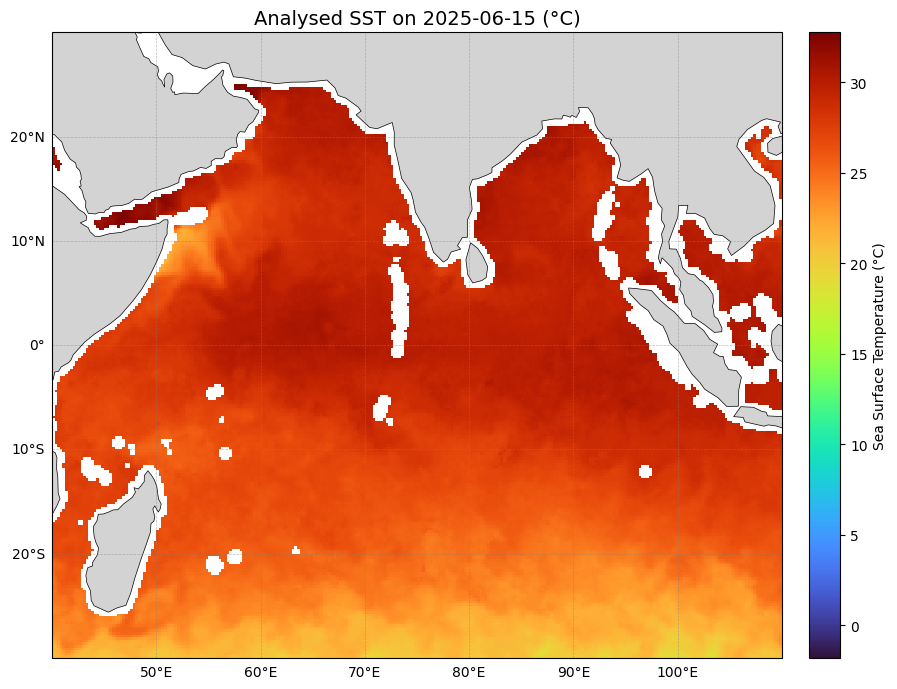

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

# ========================
# File path
# ========================
file_path = r"E:\INCOIS\ITCOO\Classes\SNOM_Navy_2025\Sst\20250615120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc"

# ========================
# Open dataset
# ========================
ds = xr.open_dataset(file_path)

# Inspect variables
print("\nVariables in file:")
for var in ds.variables:
    long_name = ds[var].attrs.get('long_name', 'No description')
    units = ds[var].attrs.get('units', 'No units')
    print(f" - {var}: dims={ds[var].dims}, shape={ds[var].shape}, long_name='{long_name}', units='{units}'")

# ========================
# Extract SST and convert from Kelvin to Celsius
# ========================
sst_c = ds['analysed_sst'].squeeze()
if ds['analysed_sst'].attrs.get('units', '').lower() in ['kelvin', 'k']:
    sst_c = sst_c - 273.15  # Kelvin to °C

# ========================
# Region extent (lon_min, lon_max, lat_min, lat_max)
# ========================
region_extent = [40, 110, -30, 30]  # Indian Ocean example

# ========================
# Plot SST data with basemap
# ========================
fig = plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set extent
ax.set_extent(region_extent, crs=ccrs.PlateCarree())

# Add land and coastlines
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=2)

# Plot SST data
im = ax.pcolormesh(
    ds['lon'], ds['lat'], sst_c,
    cmap='turbo', transform=ccrs.PlateCarree(),
    zorder=0
)

# Latitude and longitude gridlines + labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Add colorbar to the right
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, fraction=0.05)
cbar.set_label("Sea Surface Temperature (°C)")

# Title
time_str = str(ds['time'].values[0])[:10]
plt.title(f"Analysed SST on {time_str} (°C)", fontsize=14)

plt.tight_layout()
plt.show()


In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from pathlib import Path

# ========================
# Folder path
# ========================
folder_path = Path(r"E:\INCOIS\ITCOO\Classes\SNOM_Navy_2025\Sst")

# ========================
# Region extent (lon_min, lon_max, lat_min, lat_max)
# ========================
region_extent = [40, 110, -30, 30]  # Example: Indian Ocean

# ========================
# Loop over all .nc files in folder
# ========================
for file_path in sorted(folder_path.glob("*.nc")):
    print(f"Processing: {file_path.name}")
    
    # Open dataset
    ds = xr.open_dataset(file_path)
    
    # Extract SST and convert from Kelvin to Celsius if needed
    sst_c = ds['analysed_sst'].squeeze()
    if ds['analysed_sst'].attrs.get('units', '').lower() in ['kelvin', 'k']:
        sst_c = sst_c - 273.15
    
    # Prepare figure
    fig = plt.figure(figsize=(14, 7))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # Set extent
    ax.set_extent(region_extent, crs=ccrs.PlateCarree())
    
    # Add land and coastlines
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=2)
    
    # Plot SST data
    im = ax.pcolormesh(
        ds['lon'], ds['lat'], sst_c,
        cmap='turbo', transform=ccrs.PlateCarree(),
        zorder=0
    )
    
    # Latitude and longitude labels
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    # Colorbar to the right
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, fraction=0.05)
    cbar.set_label("Sea Surface Temperature (°C)")
    
    # Title with date
    time_str = str(ds['time'].values[0])[:10]
    plt.title(f"Analysed SST on {time_str} (°C)", fontsize=14)
    
    plt.tight_layout()
    
    # Save figure
    output_file = folder_path / f"{file_path.stem}_SST.png"
    plt.savefig(output_file, dpi=300)
    plt.close()
    
    ds.close()

print("✅ All plots generated and saved.")


Processing: 20250615120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
Processing: 20250711120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
Processing: 20250729120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
✅ All plots generated and saved.


C:\Users\siva4\AppData\Local\Temp\ipykernel_21812\1957492913.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.96])


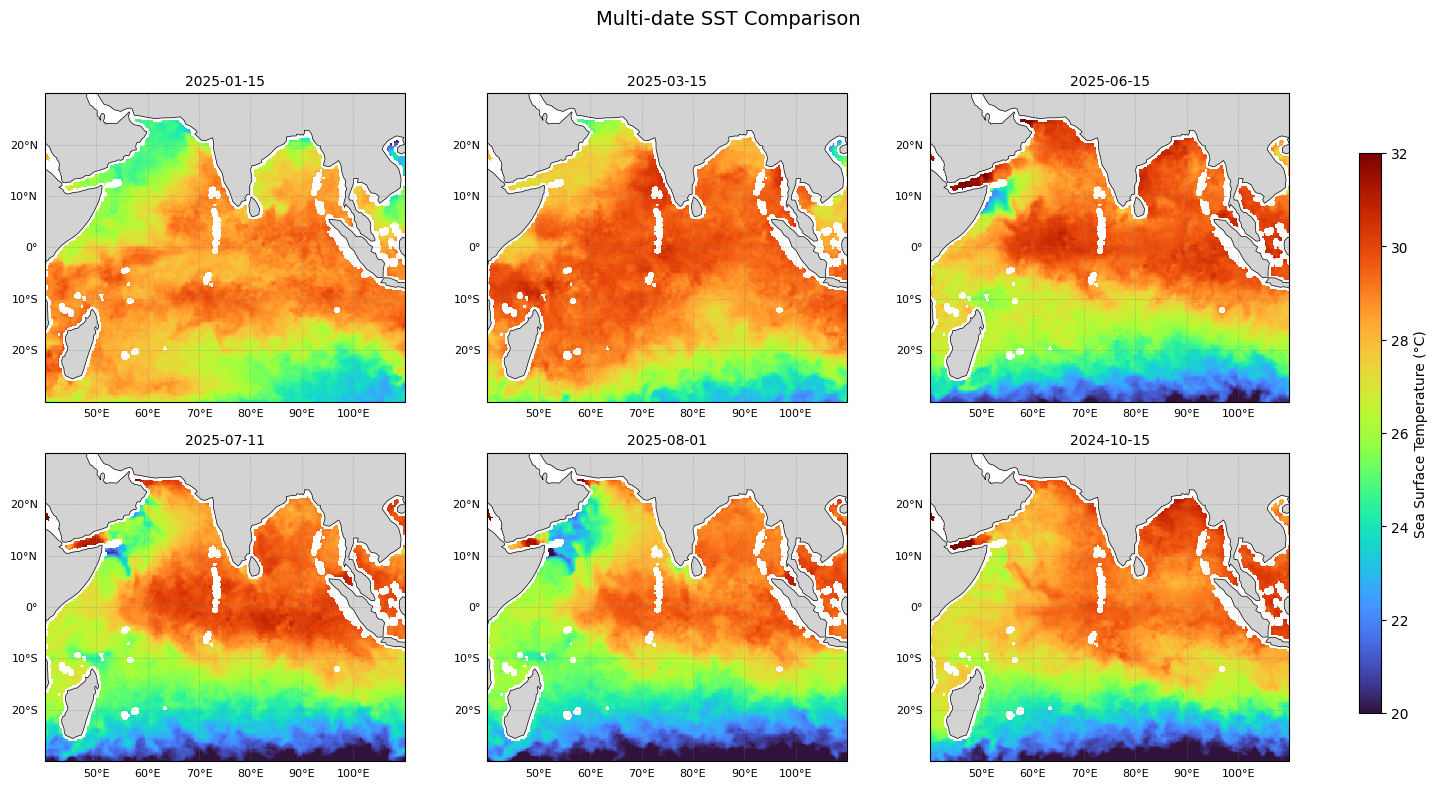

In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from pathlib import Path
import math
import pandas as pd


# ========================
# Folder path
# ========================
folder_path = Path(r"E:\INCOIS\ITCOO\Classes\SNOM_Navy_2025\Sst")

# ========================
# Region extent (lon_min, lon_max, lat_min, lat_max)
# ========================
region_extent = [40, 110, -30, 30]  # Example: Indian Ocean

# ========================
# Colorbar range (None for auto)
# Example: (20, 32) for fixed °C range
# ========================
fixed_cbar_range = (20, 32)  # or None

# ========================
# Load all .nc files
# ========================
def sort_by_month_day(file_path):
    with xr.open_dataset(file_path) as ds:
        t = pd.to_datetime(ds['time'].values[0])
        return (t.month, t.day)

nc_files = sorted(folder_path.glob("*.nc"), key=sort_by_month_day)
#nc_files = sorted(folder_path.glob("*.nc"))
n_files = len(nc_files)

# Determine subplot grid size
cols = 3
rows = math.ceil(n_files / cols)

# ========================
# First pass to find min/max if auto colorbar
# ========================
if fixed_cbar_range is None:
    all_values = []
    for file_path in nc_files:
        ds = xr.open_dataset(file_path)
        sst_c = ds['analysed_sst'].squeeze()
        if ds['analysed_sst'].attrs.get('units', '').lower() in ['kelvin', 'k']:
            sst_c = sst_c - 273.15
        all_values.append(sst_c.min().item())
        all_values.append(sst_c.max().item())
        ds.close()
    vmin, vmax = min(all_values), max(all_values)
else:
    vmin, vmax = fixed_cbar_range

# ========================
# Plot all in subplots
# ========================
fig = plt.figure(figsize=(5 * cols, 4 * rows))

for i, file_path in enumerate(nc_files, 1):
    ds = xr.open_dataset(file_path)
    
    # Extract SST and convert from Kelvin to °C if needed
    sst_c = ds['analysed_sst'].squeeze()
    if ds['analysed_sst'].attrs.get('units', '').lower() in ['kelvin', 'k']:
        sst_c = sst_c - 273.15
    
    ax = plt.subplot(rows, cols, i, projection=ccrs.PlateCarree())
    ax.set_extent(region_extent, crs=ccrs.PlateCarree())
    
    # Add land and coastlines
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=2)
    
    # Plot SST
    im = ax.pcolormesh(
        ds['lon'], ds['lat'], sst_c,
        cmap='turbo', transform=ccrs.PlateCarree(),
        zorder=0, vmin=vmin, vmax=vmax
    )
    
    # Gridlines and labels
    gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    # Title
    time_str = str(ds['time'].values[0])[:10]
    ax.set_title(time_str, fontsize=10)
    
    ds.close()

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.1, 0.015, 0.7])  # position: x, y, width, height
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Sea Surface Temperature (°C)")

plt.suptitle("Multi-date SST Comparison", fontsize=14)
plt.tight_layout(rect=[0, 0, 0.9, 0.96])

plt.show()
